# Grafica Jacky

Librerias utilizadas: 

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  2.0.0     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.3.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Datos

Nos inventamos unos datos para que funcione el experimento

In [ ]:
# Leemos los datos (GENERAMOS LOS DATOS!)
datos.x <- c(0.98,1,1.2,1.2)
datos.y <- c(0.085, 0.09, 0.09, 0.13)
clases <- c("A", "B", "A", "B")
datos <- cbind(datos.x, datos.y, clases) %>% as.data.frame()
datos$datos.y <- as.numeric(as.character(datos$datos.y))
datos$datos.x <- as.numeric(as.character(datos$datos.x))
lapply(datos, class)
rm(datos.x, datos.y)

La gráfica que deseamos realizar tiene de fondo cuadros de colores. Por lo tanto, utilizaremos, de la librería `ggplot2`, la función `geom_tile`, que, a partir de una base de centroides (y donde también se le puede especificar un `height` y un `width`) nos generará cuadritos sobre los ejes de la gráfica. 

A continuación procederemos a realizar una gráfica ejemplo:

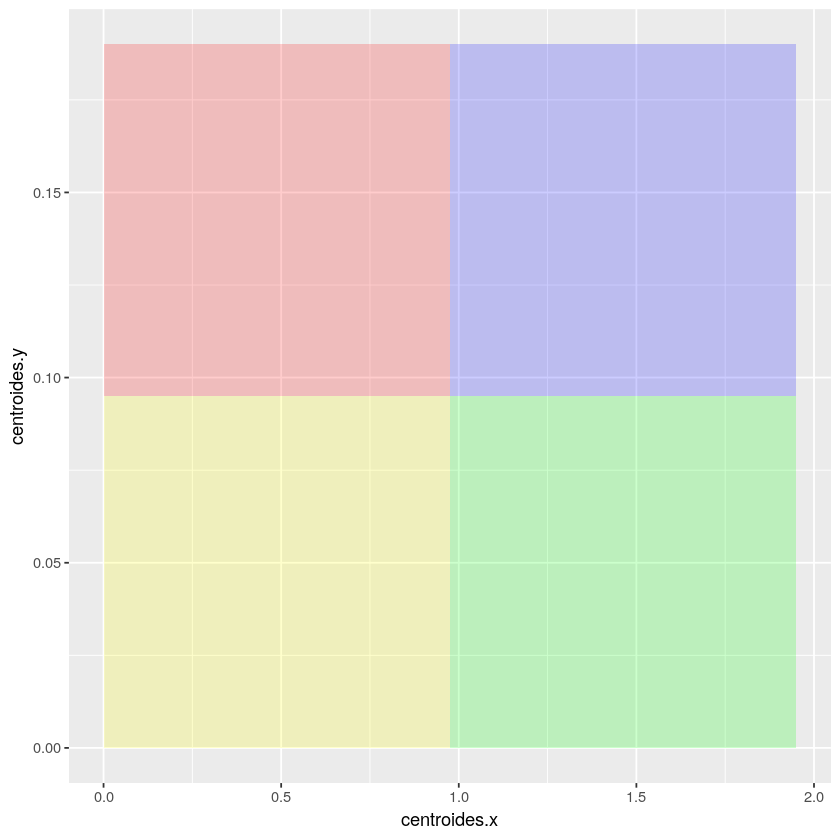

In [2]:
# Calculamos los centroides de los rectangulos del fondo
cortes_ejes <- c(0.975, 0.095)
centroides.x <- c(cortes_ejes[1]/2, cortes_ejes[1]/2, cortes_ejes[1]*1.5, cortes_ejes[1]*1.5)
centroides.y <- c(cortes_ejes[2]/2, cortes_ejes[2]*1.5, cortes_ejes[2]/2, cortes_ejes[2]*1.5)
centroides <- cbind(centroides.x, centroides.y) %>% as.data.frame()

# Sólo para los cuadros!
ggplot(centroides, aes(centroides.x, centroides.y)) +
  geom_tile(fill = c("yellow", "red", "green", "blue"), alpha = 0.2)


Ahora, con los datos inventados hasta arriba, procederemos a realizar la gráfica ejemplo de interés. Para ver que realiza cada función, procederemos a leer el comentario asociado: 

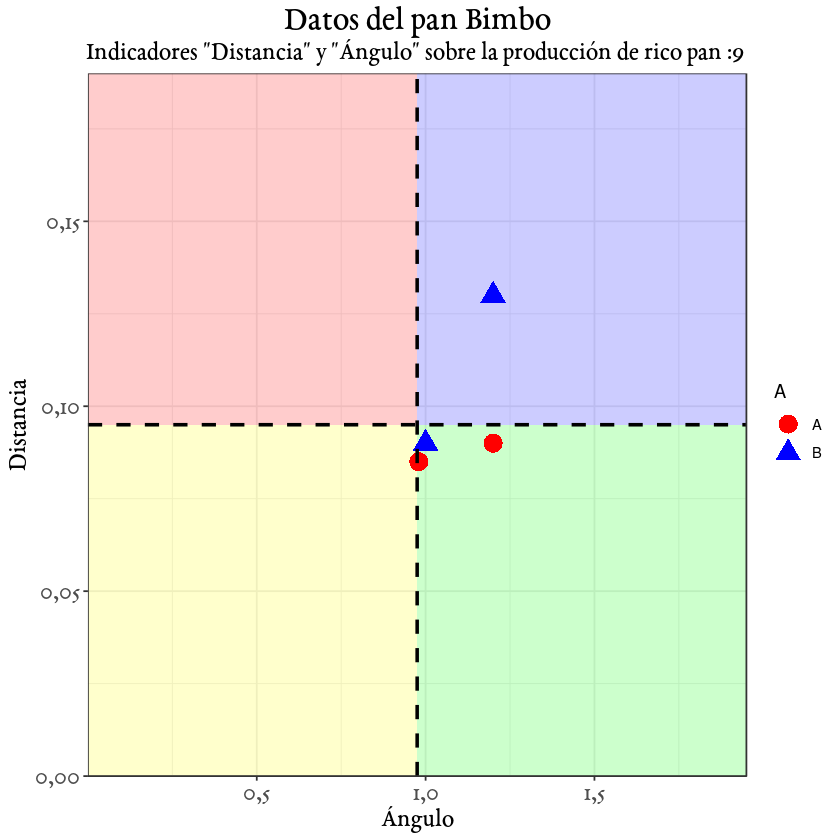

In [3]:
# Plot 
ggplot() +  # Activamos la función para hacer gráficas
geom_tile(data = centroides, aes(centroides.x, centroides.y), # Hacemos la grafica de cuadros con los datos de arriba 
          fill = c("yellow", "red", "green", "blue"), # Colores de los cuadros
          alpha = 0.2)  + # Transparencia de los cuadros
  geom_point(data = datos, aes(x = datos$datos.x,  # Coordenadas X de los puntos
                               y = datos$datos.y,  # Coordenadas y de los puntos
                               colour = clases,    # Variable para para diferenciar los puntos y darles diferentes formas
                               shape = clases),    # Variable para diferenciar los puntos y darles diferentes formas
                               size = 5) +         # Tamaño de los puntos en pixeles
  scale_colour_manual(name = clases, values = c("red", "blue")) +  # Paleta de colores para los puntos (en este caso, rojo y azuk)
  guides(colour = guide_legend(override.aes = list(shape = c(16,17)))) + # Esta parte me la inventé de última hora... no sabría explicarla
  geom_hline(yintercept=0.095, linetype="dashed", # Codigo para poner una linea horizontal en la coordenada y que especificamos
             color = "black", size=1) + 
  geom_vline(xintercept = 0.975, linetype="dashed", # Linea para poner una linea vertical en la coordenada y que especifiquemos
             color = "black", size=1) + 
  theme_bw() + # Cambia en fondo de gris a blanco y negro
  scale_y_continuous(expand = c(0, 0)) +  # Elimina espaciado entre los bordes del grafico y las lineas de eje x
  scale_x_continuous(expand = c(0, 0)) +  # Elimina espaciado entre los bordes del gráfico y las lineas del eje y
  theme(plot.title = element_text(family = "EBGaramond",  size = 20, hjust = 0.5),   # Modifica el formato del titulo
        plot.subtitle = element_text(family = "EBGaramond", size = 15, hjust = 0.5), # Modifica el formato del subtitulo
        axis.title = element_text(family = "EBGaramond", size = 15, hjust = 0.5),    # Modifica el formato de la etiqueta de los ejes
        axis.text = element_text(family = "EBGaramond", size = 15, hjust = 0.5)      # Modifica el formato de los numeros sobre los ejes
  ) + 
  labs(x = "Ángulo",   # label eje x
       y = "Distancia", 
       title = "Datos del pan Bimbo", 
       subtitle = 'Indicadores "Distancia" y "Ángulo" sobre la producción de rico pan :9 ') + 
  scale_shape(guide = FALSE) # Elimina la leyenda de la figura
  

Y eso es todo :9